## Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

## Reading file

In [2]:
df=pd.read_csv('paydayloan_collections.csv')

## Data exploration

In [3]:
df.head()

,payment,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30
0,Success,qw,hk,3.11,16.06,-4.60,22.34,13.53,1.53,nv,...,8.94,-12.76,ub,12.06,2.46,4.73,-1.72,0.91,ev,8.00
1,Denied,qw,rv,3.35,11.18,-18.55,6.68,12.78,6.62,nv,...,31.02,34.76,cz,1.44,9.44,13.56,-2.24,0.24,ev,-2.90
2,Denied,qw,zg,4.15,29.19,18.91,16.40,3.67,5.72,ch,...,23.26,9.50,ri,7.77,8.70,-1.75,5.96,1.91,ev,22.67
3,Success,wv,js,6.23,15.70,2.81,4.46,5.13,8.66,ja,...,29.25,-1.53,ri,8.94,19.33,23.73,5.54,0.85,ev,36.31
4,Success,ma,xn,1.28,20.71,14.98,11.19,17.66,1.13,nv,...,2.19,10.24,ub,8.92,5.48,-0.28,4.01,1.21,ev,11.33


In [4]:
df.columns

Index(['payment', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7',
       'var8', 'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15',
       'var16', 'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23',
       'var24', 'var25', 'var26', 'var27', 'var28', 'var29', 'var30'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   payment  30000 non-null  object 
 1   var1     30000 non-null  object 
 2   var2     30000 non-null  object 
 3   var3     30000 non-null  float64
 4   var4     30000 non-null  float64
 5   var5     30000 non-null  float64
 6   var6     30000 non-null  float64
 7   var7     30000 non-null  float64
 8   var8     30000 non-null  float64
 9   var9     30000 non-null  object 
 10  var10    30000 non-null  object 
 11  var11    30000 non-null  object 
 12  var12    30000 non-null  float64
 13  var13    30000 non-null  object 
 14  var14    30000 non-null  float64
 15  var15    30000 non-null  float64
 16  var16    30000 non-null  float64
 17  var17    30000 non-null  object 
 18  var18    30000 non-null  float64
 19  var19    30000 non-null  object 
 20  var20    30000 non-null  float64
 21  var21    300

## Data cleaning

In [6]:
#checking response variable from the dataset
df['payment'].value_counts()

Denied     18755
Success    11245
Name: payment, dtype: int64

Text(0.5, 1.0, 'Count of payment successful or not')

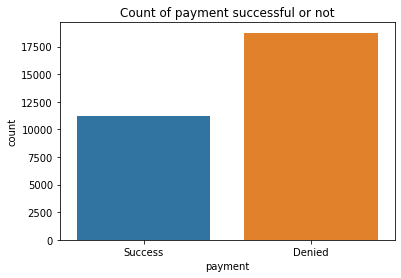

In [7]:
#plot the count of response var
sns.countplot(df['payment'])
plt.title('Count of payment successful or not')

In [8]:
#since 'payment' column is object type, we will need to convert it to numeric 
df['Y'] = np.where(df['payment']=='Success',1,0)
df.drop(['payment'],1,inplace=True)

In [9]:
#checking if conversion was correct
df['Y'].value_counts()

0    18755
1    11245
Name: Y, dtype: int64

In [10]:
#var1, var2, var9, var10, var11, var13, var17, var19, var23, var29 are all categorical variables and can be converted to dummies
cols = ['var1', 'var2', 'var9', 'var10', 'var11', 'var13', 'var17', 'var19', 'var23', 'var29']

for col in cols:
    dummy=pd.get_dummies(df[col],prefix=col,drop_first=True)
    df=pd.concat([df,dummy],axis=1)
    print(col)
    del df[col]
del dummy

var1
var2
var9
var10
var11
var13
var17
var19
var23
var29


In [11]:
#making sure all cols are numeric 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 63 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   var3      30000 non-null  float64
 1   var4      30000 non-null  float64
 2   var5      30000 non-null  float64
 3   var6      30000 non-null  float64
 4   var7      30000 non-null  float64
 5   var8      30000 non-null  float64
 6   var12     30000 non-null  float64
 7   var14     30000 non-null  float64
 8   var15     30000 non-null  float64
 9   var16     30000 non-null  float64
 10  var18     30000 non-null  float64
 11  var20     30000 non-null  float64
 12  var21     30000 non-null  float64
 13  var22     30000 non-null  float64
 14  var24     30000 non-null  float64
 15  var25     30000 non-null  float64
 16  var26     30000 non-null  float64
 17  var27     30000 non-null  float64
 18  var28     30000 non-null  float64
 19  var30     30000 non-null  float64
 20  Y         30000 non-null  in

## Modelling 

In [12]:
x=df.drop(['Y'],1)
y=df['Y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [14]:
# nm = MinMaxScaler()
# x_train = nm.fit_transform(x_train)
# x_test = nm.transform(x_test)

### Logistic Regression

In [15]:
logr=LogisticRegression()

logr.fit(x_train, y_train)

logr_pred=logr.predict(x_test)

accuracy_score(y_test, logr_pred)

0.86

### Decision Tree

In [16]:
%%time
dtree = DecisionTreeClassifier()

dtree.fit(x_train, y_train)

dtree_pred=dtree.predict(x_test)

accuracy_score(y_test, dtree_pred)

0.7735
Wall time: 2.05 s


### Random Forest

In [17]:
%%time
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

rf_pred=rf.predict(x_test)

accuracy_score(y_test, rf_pred)

Wall time: 12.4 s


0.8585

In [18]:
rf.feature_importances_

array([2.43858562e-02, 2.51524621e-02, 2.52149554e-02, 2.44874935e-02,
       3.42911101e-02, 2.56599233e-02, 2.43733460e-02, 2.50114040e-02,
       2.51395138e-02, 4.75733164e-02, 2.57426024e-02, 2.49716572e-02,
       2.50179956e-02, 2.49505362e-02, 2.51657662e-02, 3.16187359e-01,
       2.52676091e-02, 2.50563130e-02, 2.40586582e-02, 2.50099563e-02,
       1.40652281e-03, 3.67266173e-03, 3.49805523e-03, 2.95244230e-03,
       2.75872826e-03, 2.13108155e-04, 3.43396803e-03, 8.88878146e-04,
       2.33167677e-03, 1.43683988e-03, 1.82178159e-03, 2.01781234e-03,
       3.75927284e-03, 3.75445843e-03, 2.13037231e-03, 3.11828432e-03,
       2.87556960e-03, 2.54306826e-03, 1.27027945e-03, 2.09404365e-03,
       3.51918603e-03, 7.65628338e-04, 4.33638511e-02, 1.60376781e-02,
       3.07912646e-03, 7.47934990e-03, 3.76088388e-03, 1.26976366e-03,
       5.70072110e-04, 2.63722145e-03, 3.29965588e-03, 2.89984310e-03,
       1.69665481e-03, 2.12185378e-03, 3.67256491e-04, 2.68210657e-03,
      

### Extra trees

In [19]:
#read: https://www.thekerneltrip.com/statistics/random-forest-vs-extra-tree/#:~:text=The%20main%20difference%20between%20random,(for%20the%20extra%20trees)

In [20]:
%%time
et=ExtraTreesClassifier()

et.fit(x_train, y_train)

et_pred=et.predict(x_test)

accuracy_score(y_test, et_pred)

Wall time: 7.87 s


0.816

In [21]:
# accuracy is less when ET is used but the time taken is also less